In [65]:
# https://debuggercafe.com/semantic-segmentation-using-pytorch-fcn-resnet/

import torch
import torchvision
from torchvision.models.segmentation import fcn_resnet50

# get a pre-trained model for proof-of-concept
model = fcn_resnet50(pretrained=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# model is trained on 20* classes from COCO 2017
classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

c:\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [66]:
from PIL import Image
import torchvision.transforms as tf

image = Image.open('./Data/dummy_tests/mad1.png').convert('RGB')

In [67]:
transform = tf.Compose([
    tf.Resize((224, 224)),
    tf.ToTensor(),
    tf.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # imagenet normalization
])

input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0).to(device)

In [68]:
outputs = model(input_batch)
output = outputs['out']
output.shape

torch.Size([1, 21, 224, 224])

In [69]:
out_image = output[0]
out_image

tensor([[[15.0321, 15.0321, 15.0321,  ...,  9.9588,  9.9588,  9.9588],
         [15.0321, 15.0321, 15.0321,  ...,  9.9588,  9.9588,  9.9588],
         [15.0321, 15.0321, 15.0321,  ...,  9.9588,  9.9588,  9.9588],
         ...,
         [ 7.9337,  7.9337,  7.9337,  ...,  9.9257,  9.9257,  9.9257],
         [ 7.9337,  7.9337,  7.9337,  ...,  9.9257,  9.9257,  9.9257],
         [ 7.9337,  7.9337,  7.9337,  ...,  9.9257,  9.9257,  9.9257]],

        [[-0.3497, -0.3497, -0.3497,  ..., -2.3717, -2.3717, -2.3717],
         [-0.3497, -0.3497, -0.3497,  ..., -2.3717, -2.3717, -2.3717],
         [-0.3497, -0.3497, -0.3497,  ..., -2.3717, -2.3717, -2.3717],
         ...,
         [-2.0066, -2.0066, -2.0066,  ...,  0.2544,  0.2544,  0.2544],
         [-2.0066, -2.0066, -2.0066,  ...,  0.2544,  0.2544,  0.2544],
         [-2.0066, -2.0066, -2.0066,  ...,  0.2544,  0.2544,  0.2544]],

        [[-2.8340, -2.8340, -2.8340,  ..., -3.2792, -3.2792, -3.2792],
         [-2.8340, -2.8340, -2.8340,  ..., -3

In [70]:
import numpy as np

probs = torch.softmax(outputs['out'], dim=1)

seg_map = torch.argmax(probs, dim=1)
seg_map = seg_map.detach().cpu().numpy()
seg_map = seg_map[0]
seg_map.shape

(224, 224)

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# seg_map_normed = seg_map.astype(float) / seg_map.max()
# seg_map_normed

cmap = plt.get_cmap('tab20b', len(classes))
colors = cmap(np.arange(len(classes)))[:, :3]
seg_map_colored = colors[seg_map]

legend_patches = [mpatches.Patch(color=colors[i], label=classes[i]) for i in range(len(classes))]

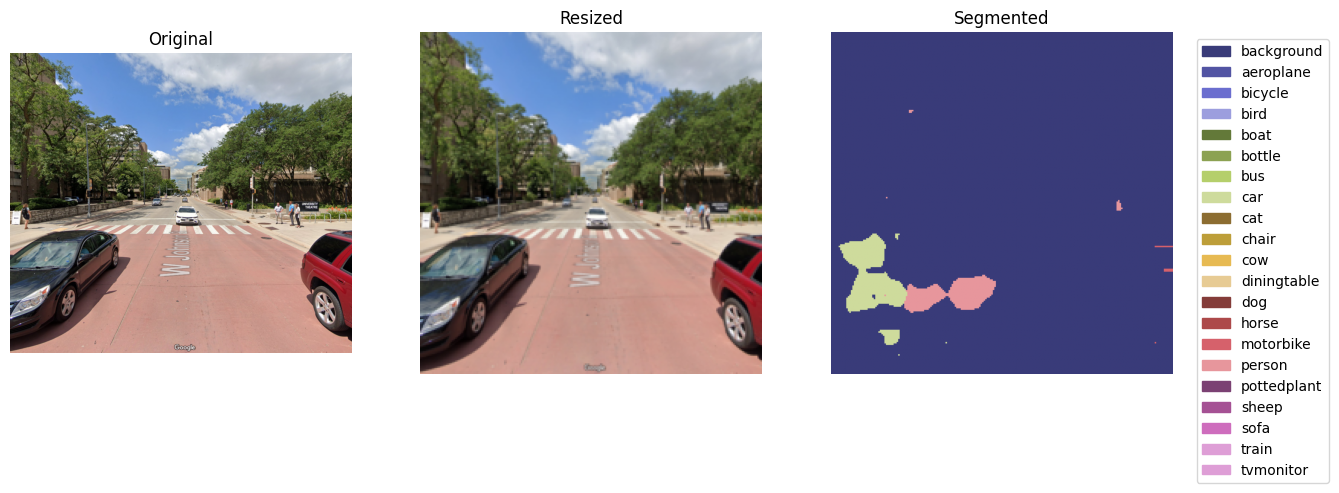

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(tf.Resize((224, 224))(image))
plt.title('Resized')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(seg_map_colored)
plt.title('Segmented')
plt.axis('off')

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()